
 The problem statement for this dataset is to build a regression model that can predict the miles per gallon (mpg) of a car based on its other attributes, such as the number of cylinders, displacement, horsepower, weight, acceleration, model year, and origin. This can be useful in predicting the fuel efficiency of new car models or in analyzing the factors that contribute to a car's fuel economy.




Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

Understanding the data


In [ ]:
df = pd.read_csv('/content/auto-mpg.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [ ]:
df.shape

(398, 9)

In [ ]:
df.size

3582

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df['car name'].value_counts()

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [ ]:
num_cols =["mpg", "displacement", "weight", "acceleration"] 
cat_cols =["cylinders",  "model year","horsepower", "origin"]

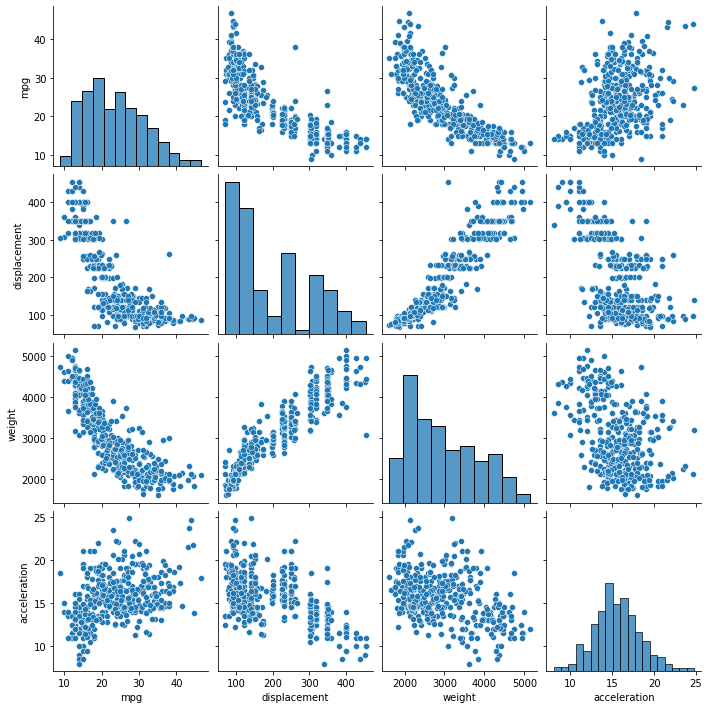

In [ ]:
sns.pairplot(df[num_cols])

<AxesSubplot:xlabel='cylinders', ylabel='count'>

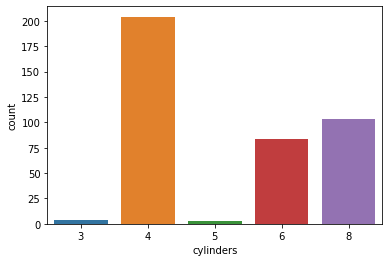

In [ ]:
sns.countplot(x='cylinders',data=df)

<AxesSubplot:xlabel='horsepower', ylabel='count'>

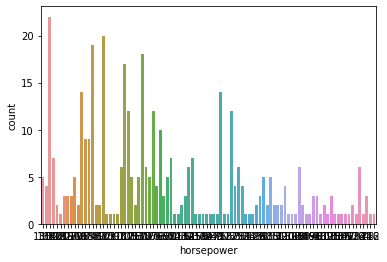

In [ ]:
sns.countplot(x='horsepower',data=df)

In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
df["origin"].value_counts() #categorical

1    249
3     79
2     70
Name: origin, dtype: int64

In [ ]:
df["model year"].value_counts() #categorical

73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81    29
71    28
72    28
77    28
74    27
Name: model year, dtype: int64

In [ ]:
df["cylinders"].value_counts() #categorical

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

In [ ]:
df["car name"].value_counts() #categorical

ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: car name, Length: 305, dtype: int64

In [ ]:
df["horsepower"].value_counts() #categorical

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05c8017b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05c8020160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05c80178b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05c8020700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05c80209d0>],
 'means': []}

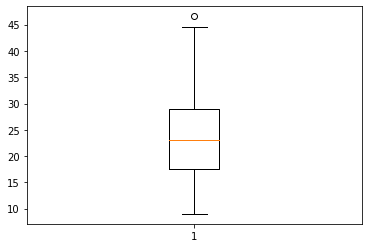

In [ ]:
plt.boxplot(data=df,x="mpg")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05c7f987f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05c7f98d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05c7f98520>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05c7fa9370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05c7fa9640>],
 'means': []}

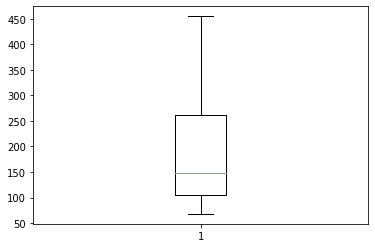

In [ ]:
plt.boxplot(data=df,x="displacement")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05c7f06b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05c7f15100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05c7f06850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05c7f156a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05c7f15970>],
 'means': []}

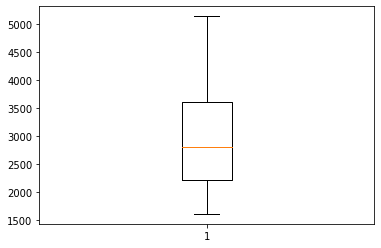

In [ ]:
plt.boxplot(data=df,x="weight")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f05c7e717c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f05c7e71d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f05c7e714f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f05c7e80340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f05c7e80610>],
 'means': []}

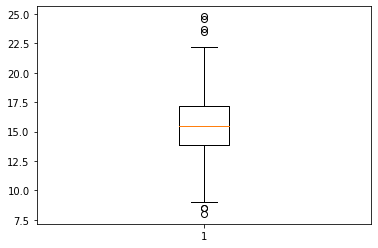

In [ ]:
plt.boxplot(data=df,x="acceleration")

<AxesSubplot:>

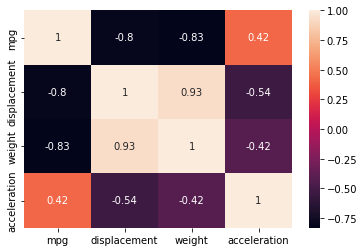

In [ ]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [ ]:
df[num_cols]=df[num_cols].astype(int)
df[cat_cols]=df[cat_cols].astype('category')

In [ ]:
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mode()[0])

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.dtypes

mpg                int64
cylinders       category
displacement       int64
horsepower      category
weight             int64
acceleration       int64
model year      category
origin          category
car name          object
dtype: object

In [ ]:
df.drop(['car name'],axis=1,inplace = True)

In [ ]:
df['cylinders']=df['cylinders'].astype('category').cat.codes
df['horsepower']=df['horsepower'].astype('category').cat.codes
df['model year']=df['model year'].astype('category').cat.codes
df['origin']=df['origin'].astype('category').cat.codes


In [ ]:
df.dtypes

mpg             int64
cylinders        int8
displacement    int64
horsepower       int8
weight          int64
acceleration    int64
model year       int8
origin           int8
dtype: object

In [ ]:
# Split the data into training and testing sets
train = df.sample(frac=0.8,random_state=123)
test = df.drop(train.index)

In [ ]:
train

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
150,26,1,108,39,2391,15,4,2
42,12,4,383,82,4955,11,1,0
120,19,1,121,52,2868,15,3,1
102,26,1,97,0,1950,21,3,1
293,31,1,89,18,1925,14,9,1
...,...,...,...,...,...,...,...,...
318,29,1,134,36,2711,15,10,2
103,11,4,400,72,4997,14,3,0
149,24,1,120,43,2489,15,4,2
139,14,4,302,67,4638,16,4,0


In [ ]:
test

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
1,15,4,350,78,3693,11,0,0
2,18,4,318,72,3436,11,0,0
3,16,4,304,72,3433,12,0,0
17,21,3,200,31,2587,16,0,0
18,27,1,97,34,2130,14,0,2
...,...,...,...,...,...,...,...,...
382,34,1,108,17,2245,16,12,2
385,38,1,91,14,1995,16,12,2
390,32,1,144,42,2665,13,12,2
395,32,1,135,30,2295,11,12,0


In [ ]:
X_train = train.drop(['mpg'],axis=1)
y_train = train['mpg']
X_test = test.drop(['mpg'],axis=1)
y_test = test['mpg']

In [ ]:
import numpy as np

# define a function to generate polynomial features
def generate_poly_features(X, degree):
    poly_features = np.empty((X.shape[0], 0))
    for d in range(1, degree+1):
        poly_features = np.hstack((poly_features, np.power(X, d)))
    return poly_features

# define a function to fit polynomial regression
def fit_poly_reg(X, y, degree):
    X_poly = generate_poly_features(X, degree)
    # add intercept term
    X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
    # calculate coefficients
    beta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return beta

# define a function to predict using polynomial regression
def predict_poly_reg(X, beta, degree):
    X_poly = generate_poly_features(X, degree)
    # add intercept term
    X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
    # predict values
    y_pred = X_poly.dot(beta)
    return y_pred

In [ ]:
# fit polynomial regression
degree = 2
beta = fit_poly_reg(X_train, y_train, degree)

# predict on test set
y_pred = predict_poly_reg(X_test, beta, degree)

# calculate R2 score
ssr = np.sum((y_pred - y_test) ** 2)
sst = np.sum((y_test - np.mean(y_test)) ** 2)
r2_score = 1 - (ssr / sst)

print('R2 score:', r2_score)

R2 score: 0.8468537551748742


In [ ]:
# Calculate the mean squared error (MSE)
mse = np.mean((y_pred - y_test)**2)
print("Mean squared error:", mse)

Mean squared error: 10.46063032367947
